In [1]:
# Package imports
from SGD.dynamics import Trainer
from SGD.data import DataGenerator , SpikeGenerator
from SGD.plot_config import *
from SGD.utils import initialize_weights , make_params_dict , save_fig , save_data , load_data , make_data_paths

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# Plot styles
apply_general_styles()

# Simple Example

In [8]:
# Minimal Parameters
d = 40
spike = True
snr = 0.9
teacher = 'He4'
student = 'He4'
loss = 'corr'
lr = 0.001
N_steps = int(20*d**3)

# Initialize weights
u_spike, w_initial = initialize_weights(d,m0=0.0,mode='fixed')

# Initialize data generator
data_generator = SpikeGenerator(d,u_spike,snr) if spike else DataGenerator(d, teacher, u_spike)

# Initialize Trainer
trainer = Trainer(d, u_spike, student, loss, lr, data_generator)

# Save data
tprints = np.unique(np.logspace(-0.1,np.log10(N_steps),100).astype(int))
data = {'overlap':[],'times':tprints}

# Run evolution
t0 = time.time()
print("Starting training...")
for step, (w_student, flag , grad) in enumerate(trainer.evolution(w_initial, N_steps, progress=True)):
    if step in tprints: # Save some steps
        data['overlap'].append(w_student @ u_spike)

dt = time.time() - t0
print(f"End training... Took = {dt/60:.4} min")

# Optional Step
for key in data:
    data[key] = np.array(data[key])

# Save data
name_vars = ['d','snr']
params = make_params_dict(name_vars)
save_data(data,file_name='test',params=params,base_dir='../data')

# Load data
data_loaded = load_data(file_name='test',params=params)

Starting training...


100%|██████████| 1280000/1280000 [00:44<00:00, 28814.58it/s]

End training... Took = 0.7404 min
File saved with pickle.dump on ../data\ as test_d40_snr0.9.pkl
File test_d40_snr0.9.pkl loaded with pickle.load from ../data\


Figure saved on ../plots\ as test_d40_snr0.9.png


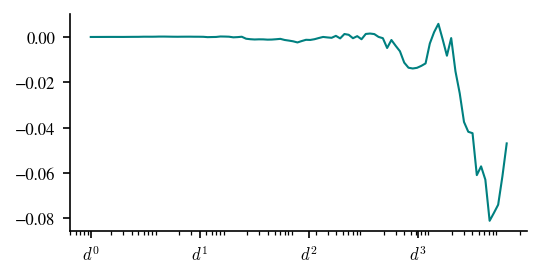

In [10]:
# Other variables
col = pc_colors[0]
xtk = [d**i for i in range(4)]
xlb = [rf'$d^{i}$' for i in range(4)]

# Create figure and plot and font setup
set_font_sizes('normal')
fig , axes = create_fig()
ax = axes
ax.plot(data_loaded['times'][1:],data_loaded['overlap'],color=col,lw=1)
ax.set_xscale('log')
ax.set_xticks(xtk,xlb)

# Save figure
save_fig(fig, file_name='test', params=params)

# Plot spiked trajectories

In [4]:
# Load the data

# Parameters fixed
d = 100
alpha = 70.0
snr = 0.9
spike = True

# Parameter lists
modes = ['online','repeat']
losses = ['mse','corr']
students = ['relu','tanh']
lrs = [0.01 , 0.05 , 0.1 , 0.5]

# Parameters saved
names_fixed = ['d','snr','alpha']
names_variable = ['mode','loss','student','lr']

# Load the variables
data = {}
for mode in modes:
    data[mode] = {}
    for loss in losses:
        data[mode][loss] = {}
        for student in students:
            data[mode][loss][student] = {}
            for lr in lrs:
                params = make_params_dict(names_fixed,names_variable)
                x = load_data(file_name='overlap',experiment_name='test_spike',params=params,show=False)
                data[mode][loss][student][lr] = x

print(x.keys())

dict_keys(['overlap', 'times', 'params'])


Figure saved on ../plots\2025-10 as spiked_evolution_alpha70_d100_lossmse_modeonline_snr0.9.png


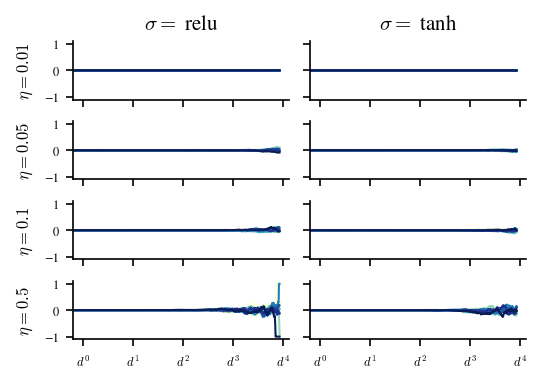

In [ ]:
# Other variables
N_walkers = x['params']['N_walkers']
mode = 'online'
loss = 'mse'

cols = plt.get_cmap(pc_cmaps[0])(np.linspace(0,1,N_walkers))
xtk = [d**i for i in range(5)]
xlb = [rf'$d^{i}$' for i in range(5)]

# Create figure and plot and font setup
set_font_sizes('tight')
fig , axes = create_fig(nrows=len(lrs),ncols=len(students),h=0.7,sharey=True)

for i , lr in enumerate(lrs):
    for j , student in enumerate(students):
        ax = axes[i,j]
        # Setupd
        if i == 0 : ax.set_title(fr'$\sigma = $ {student}')
        if j == 0 : ax.set_ylabel(fr'$\eta = {lr}$',fontsize=FONTSIZES['s'])

        # Get data and plot
        T = data[mode][loss][student][lr]['times']
        m = data[mode][loss][student][lr]['overlap']
        for w in range(N_walkers):
            ax.plot(T,m[:,w],color=cols[w])

        # Change scale
        ax.set_xscale('log')
        ax.set_xticks(xtk,xlb)
        

# Save figure
names = ['mode','loss','d','snr','alpha']
params = make_params_dict(names)
save_fig(fig, file_name='spiked_evolution', params=params,date=True)

# New data with k=3

In [36]:
# Parameters fixed
snr=5.0
alpha = 2.0
teacher = 'He3'
rho = 0.7
N_walkers = 10
loss = 'corr'
lr = 0.2
student = 'He3'
datasize = 5.0 

# Parameter lists
ds = [100,200,400,800]#[:3]
modes = ['online','repeat']
models = ['perceptron','skewed'][1:]

# Parameters to save
names_fixed = ['snr','alpha','teacher','loss','rho','N_walkers','datasize']
names_variable = ['d','mode','lr','student','model']

# Load the variables
data = {}
for d in ds:
    data[d] = {}
    for mode in modes:
        data[d][mode] = {}
        for model in models:
            data[d][mode][model] = {}
            params = make_params_dict(names_fixed,names_variable)
            x = load_data(file_name='evolutions',experiment_name='time_traces',params=params,show=False)   
            data[d][mode][model] = x

print(x.keys())



dict_keys(['overlap', 'times', 'params', 'final_w'])


Figure saved on ../plots\2025-10 as compare_online_repeat_large_dataset_alpha2_datasize5_losscorr_lr0.2_moderepeat_modelskewed_rho0.7_snr5_studentHe3.png


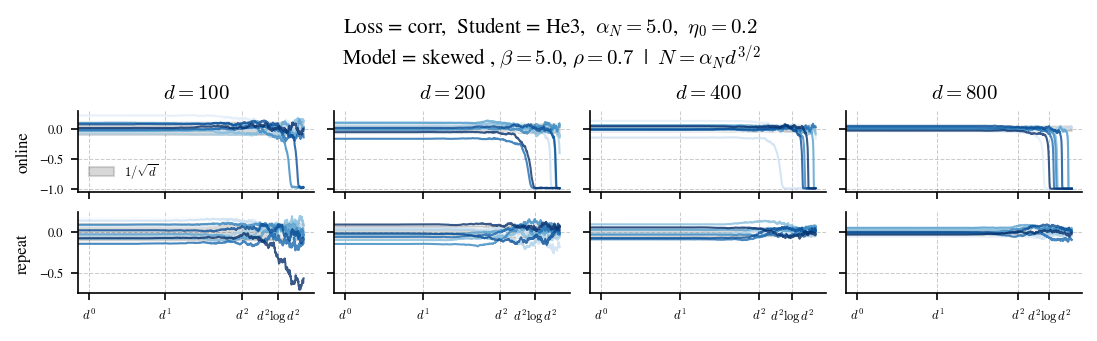

In [37]:
import matplotlib.ticker as mticker
# Other variables
N_walkers = x['params']['N_walkers']

model = 'skewed'

cols = plt.get_cmap('Blues')(np.linspace(0.,1,N_walkers))

xlb = [rf'$d^{i}$' for i in range(3)]+[r'$d^2\log d^2$']

# Create figure and plot and font setup
set_font_sizes('tight')
fig , axes = create_fig(nrows=len(modes),ncols=len(ds),h=0.3,sharey='row',size='double',sharex='col')

for i , d in enumerate(ds):
    xtk = [d**i for i in range(3)] + [d**2 * np.log(d**2)]
    for j , mode in enumerate(modes):
        ax = axes[j,i]
        # Setupd
        if i == 0 : ax.set_ylabel(fr'{mode}',fontsize=FONTSIZES['s'])
        if j == 0 : ax.set_title(fr'$d = {d}$')

        # # Change scale
        ax.set_xscale('log')
        ax.xaxis.set_major_locator(mticker.FixedLocator(xtk))   # force only these major ticks
        ax.set_xticklabels(xlb)
        ax.xaxis.set_minor_locator(mticker.NullLocator())       # hide all minor ticks

        # Get data and plot
        T = data[d][mode][model]['times']
        m = data[d][mode][model]['overlap']

        for w in range(N_walkers):
            ax.plot(T,m[:,w],color=cols[w],lw=1,alpha=0.8)
        
        ax.fill_between(T,-1/np.sqrt(d),1/np.sqrt(d),color='gray',alpha=0.3,label=r'$1/\sqrt{d}$')

        
        # Make sure only the major ticks are shown
        
        ax.grid(lw=0.5,alpha=0.2,ls='--',c='k')
        # ax.axvline(x=d**2 * np.log(d**2),color='red',ls='--',lw=1,label=r'$d^2 \log d^2$')
        # ax.axvline(x=T[-1],color='green',ls='--',lw=1,label=r'$T_f$')

 
axes[0,0].legend(frameon=False)

title = fr' Loss = {loss},  Student = {student},  $\alpha_N = {datasize}$,  $\eta_0 = {lr}$ '+'\n'+f' Model = {model} '

if model == 'perceptron':
    title += rf', Teacher = {student}  |  $N = \alpha_N \; d$'
elif model == 'skewed':
    title += rf', $\beta = {snr}$, $\rho = {rho}$  |  $N = \alpha_N d^{{3/2}}$'
fig.suptitle(title)

# Save figure
names = ['model','mode','loss','student','rho','lr','snr','alpha','datasize']
params = make_params_dict(names)
# print(params)
save_fig(fig, file_name='compare_online_repeat_large_dataset', params=params,date=True)

# Check for Repetita Iuvant

In [11]:

# Parameters fixed
alpha = 100.0
teacher = 'He3'
N_walkers = 40
loss = 'corr'
model = 'perceptron'
mode = 'online'
student = 'He3'
lr = 0.04
# Parameter lists
# ds = [500,1000,2000,4000]
# lr_values = [0.1 , 0.2  , 0.4]
# students = ['relu']
# variations = ['None','twice']
# Parameter lists
ds = [500,1000,2000,4000]
combinations = [('None','online'),('twice','online'),('None','repeat')]


# Parameters to save
names_fixed = ['alpha','teacher','loss','N_walkers','model','mode']
names_variable = ['d','lr','student','variation']

data = {}
for d in ds:
    data[d] = {}
    for i_comb , (variation , mode) in enumerate(combinations):
        params = make_params_dict(names_fixed,names_variable)
        x = load_data(file_name='evolutions',experiment_name='repetita_iuvant_check',params=params,show=False)   
        data[d][i_comb] = x


{'loss': 'corr', 'student': 'He3', 'lr': 0.04, 'teacher': 'He3'}
Figure saved on ../plots\2025-10 as repetita_iuvant_check_losscorr_lr0.04_studentHe3_teacherHe3.png


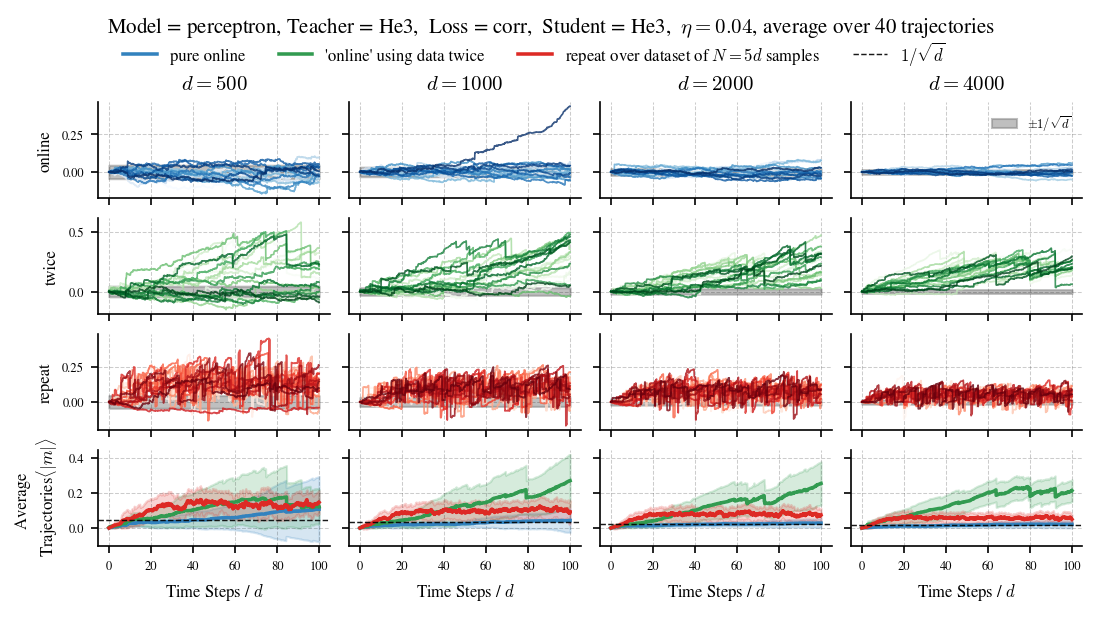

In [13]:
import matplotlib.ticker as mticker
# Other variables
N_walkers = x['params']['N_walkers']//2

# lr = 0.1
# student = 'relu'

cls = []

xlb = [rf'$d^{i}$' for i in range(3)]+[r'$d^2\log d^2$']

# Create figure and plot and font setup
set_font_sizes('tight')
fig , axes = create_fig(nrows=len(combinations)+1,ncols=len(ds),h=0.5,sharey='row',size='double',sharex='col')

for i , d in enumerate(ds):
    xtk = [d**i for i in range(3)] + [d**2 * np.log(d**2)]
    for j , (variation,mode) in enumerate(combinations):
        cols = plt.get_cmap(['Blues','Greens','Reds'][j])(np.linspace(0.,1,N_walkers))
        cls.append(cols[-7])
        ax = axes[j,i]
        # Setupd
        if i == 0 : ax.set_ylabel(['online','twice','repeat'][j],fontsize=FONTSIZES['s'])
        if j == 0 : ax.set_title(fr'$d = {d}$')

        # Get data and plot
        T = data[d][j]['times']/d
        m = data[d][j]['overlap']

        for w in range(N_walkers):
            ax.plot(T,m[:,w],color=cols[w],lw=.8,alpha=0.8)
        
        ax.fill_between(T,-1/np.sqrt(d),1/np.sqrt(d),color='gray',alpha=0.5,label=r'$\pm 1/\sqrt{d}$')
        ax.grid(lw=0.5,alpha=0.2,ls='--',c='k')

 
axes[0,-1].legend(frameon=False)

# Plot mean trajectory of both variations in last row
axs = axes[-1,:]
for i , d in enumerate(ds):
    ax = axs[i]
    ax.set_xlabel(r"Time Steps / $d$",fontsize=FONTSIZES['s'])
    # Setupd
    if i == 0 : ax.set_ylabel('Average \n Trajectories'+r'$\langle |m| \rangle $',fontsize=FONTSIZES['s'])
    # if i == 0 : ax.set_title(fr'$d = {d}$')

    # Get data and plot
    for j , lb in enumerate(['pure online',"'online' using data twice",r'repeat over dataset of $N=5d$ samples']):
        T = data[d][j]['times']/d
        m = data[d][j]['overlap']
        m_mean = np.mean(np.abs(m),axis=1)
        m_std = np.std(np.abs(m),axis=1)

        ax.plot(T,m_mean,lw=1.7,label=rf'{lb}',color=cls[j])
        ax.fill_between(T,m_mean - m_std , m_mean + m_std , color=cls[j],alpha=0.2)
    ax.axhline(y=1/np.sqrt(d),color='black',ls='--',lw=0.7,alpha=0.9,label=r'$1/\sqrt{d}$')
    # ax.fill_between(T,-1/np.sqrt(d),1/np.sqrt(d),color='gray',alpha=0.3,label=r'$1/\sqrt{d}$')
    ax.grid(lw=0.5,alpha=0.2,ls='--',c='k')

axs[0].legend(frameon=False,ncols=2)

# extract local legend from axs[0], remove it and place a global legend for the whole figure
local_legend = axs[0].get_legend()
if local_legend:
    local_legend.remove()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.3,0.9), bbox_to_anchor=(0.1, 0.99),
           ncol=len(labels), frameon=False, fontsize=FONTSIZES['s'])

# make room for the global legend
# fig.tight_layout(rect=[0, 0, 1, 0.95])

title = fr' Model = {model}, Teacher = {teacher},  Loss = {loss},  Student = {student},  $\eta = {lr}$, average over {x['params']['N_walkers']} trajectories '
fig.suptitle(title,y=1.1)

# Save figure
names = ['loss','student','lr','teacher']
params = make_params_dict(names)
print(params)
save_fig(fig, file_name='repetita_iuvant_check', params=params,date=True)